### Importação dos dados



In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja1['Loja'] = "loja 1"

loja2 = pd.read_csv(url2)
loja2['Loja'] = "loja 2"

loja3 = pd.read_csv(url3)
loja3['Loja'] = "loja 3"

loja4 = pd.read_csv(url4)
loja4['Loja'] = "loja 4"


lojas = pd.concat([loja1, loja2, loja3, loja4])
lojas.head(-1)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,Kit banquetas,moveis,392.52,18.484948,09/06/2021,Beatriz Moraes,RJ,1,cartao_credito,6,-22.25,-42.66,loja 4
2353,Mesa de jantar,moveis,303.60,16.852799,12/02/2020,Camila Ribeiro,RJ,5,cartao_credito,1,-22.25,-42.66,loja 4
2354,Cadeira de escritório,moveis,456.02,24.812798,17/05/2022,Felipe Santos,PE,5,cartao_credito,3,-8.38,-37.86,loja 4
2355,Copo térmico,esporte e lazer,48.99,3.139675,03/05/2022,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79,loja 4


#1. Análise do faturamento


In [53]:
print(lojas['Loja'].unique())


['loja 1' 'loja 2' 'loja 3' 'loja 4']


Código abaixo cria uma lista chamada faturamentos, onde cada item representa o faturamento total (soma dos preços) de uma loja específica, com base nos dados do DataFrame.

In [70]:
faturamentos = [
    float(lojas[lojas['Loja'] == loja]['Preço'].sum())
    for loja in lojas['Loja'].unique()
]

for loja, faturamento in zip(lojas['Loja'].unique(), faturamentos):
    print(f"{loja}: Faturamento total de R$ {faturamento:,.2f}")

loja 1: Faturamento total de R$ 1,534,509.12
loja 2: Faturamento total de R$ 1,488,459.06
loja 3: Faturamento total de R$ 1,464,025.03
loja 4: Faturamento total de R$ 1,384,497.58


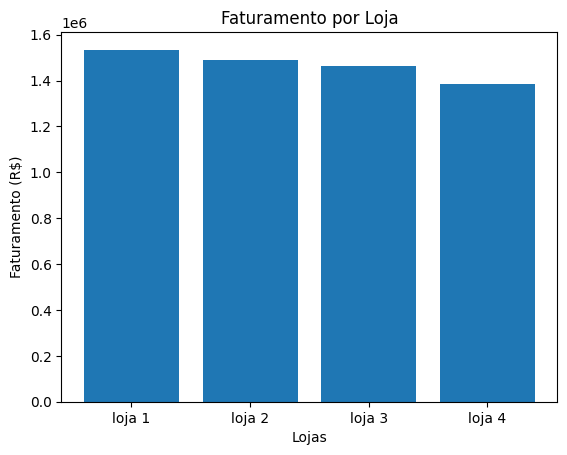

In [8]:
lojas_nomes = lojas['Loja'].unique()


plt.bar(lojas_nomes, faturamentos,)
plt.title('Faturamento por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')

plt.show()



Relatório de Faturamento por Loja
Com base na análise dos dados de vendas presentes no DataFrame(lista de jojas), foi reralizado calculado do faturamento total de cada loja a partir da soma dos valores da coluna "Preço". O resultado da análise indicou a seguinte  desempenho de faturamento:

Análise Gráfica:
A partir da observação do gráfico de barras, apresentam as seguinte indicadores de faturamnetos.

Loja 1: Apresentou o maior faturamento entre todas as unidades.

Loja 2: Ficou em segundo lugar.

Loja 3: Registrou um faturamento mais modesto.

Loja 4: Teve o menor faturamento entre todas as lojas analisadas.



# 2. Vendas por Categoria


In [9]:
print(lojas['Loja'].unique())

['loja 1' 'loja 2' 'loja 3' 'loja 4']


O codigo abaixo tem por finalidade os produtos existem em cada categoria para cada loja presente no DataFrame (lojas).

In [10]:


lojas_unicas = lojas['Loja'].unique()


categorias_por_loja = []

for loja_nome in lojas_unicas:

    loja_filtrada = lojas[lojas['Loja'] == loja_nome]

    categorias_unicas = loja_filtrada['Categoria do Produto'].unique()

    contagem_categoria = {}

    for categoria in categorias_unicas:

        quantidade = sum(loja_filtrada['Categoria do Produto'] == categoria)
        contagem_categoria[categoria] = quantidade

    categorias_por_loja.append(contagem_categoria)


Código abaixo exibe no console um resumo das categorias de produtos mais vendidas por loja, com base no codigo criada anteriormente usansdo os parametros (lojas_unicas e categorias_por_loja).

In [11]:
for loja, categorias in zip(lojas_unicas, categorias_por_loja):
    print(f"\nCategorias mais vendidas - {loja}")

    for categoria, quantidade in categorias.items():
        print(f"  - {categoria}: {quantidade} vendas")


Categorias mais vendidas - loja 1
  - eletronicos: 448 vendas
  - moveis: 465 vendas
  - brinquedos: 324 vendas
  - eletrodomesticos: 312 vendas
  - utilidades domesticas: 171 vendas
  - esporte e lazer: 284 vendas
  - livros: 173 vendas
  - instrumentos musicais: 182 vendas

Categorias mais vendidas - loja 2
  - moveis: 442 vendas
  - instrumentos musicais: 224 vendas
  - esporte e lazer: 275 vendas
  - eletronicos: 422 vendas
  - utilidades domesticas: 181 vendas
  - brinquedos: 313 vendas
  - eletrodomesticos: 305 vendas
  - livros: 197 vendas

Categorias mais vendidas - loja 3
  - eletrodomesticos: 278 vendas
  - moveis: 499 vendas
  - instrumentos musicais: 177 vendas
  - esporte e lazer: 277 vendas
  - eletronicos: 451 vendas
  - brinquedos: 315 vendas
  - utilidades domesticas: 177 vendas
  - livros: 185 vendas

Categorias mais vendidas - loja 4
  - eletrodomesticos: 254 vendas
  - moveis: 480 vendas
  - esporte e lazer: 277 vendas
  - livros: 187 vendas
  - eletronicos: 451 ve

 Código com biblioteca Seaborn - gráfico unico agrupado por categoria e loja

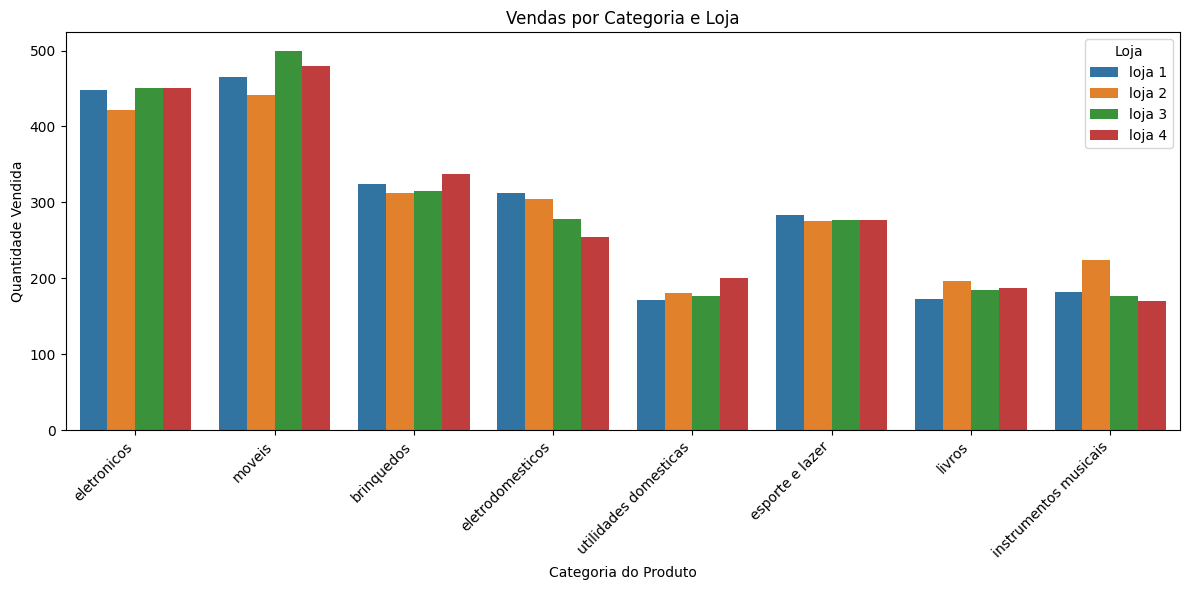

In [13]:
dados_grafico = []

for loja_nome, categorias_dict in zip(lojas_unicas, categorias_por_loja):
    for categoria, quantidade in categorias_dict.items():
        dados_grafico.append({
            'Loja': loja_nome,
            'Categoria': categoria,
            'Quantidade Vendida': quantidade
        })

df_grafico = pd.DataFrame(dados_grafico)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grafico, x='Categoria', y='Quantidade Vendida', hue='Loja')


plt.title('Vendas por Categoria e Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

Relatório de cada categorias de drodutos Mmis e menos vendidos com base no grafico

Categorias Mais Vendidas:
Móveis - mais vendido em todas as lojas, apresenta as maiores barras no gráfico, ultrapassando 400 vendas em cada loja.

Eletrônicos - Segunda categoria mais volume de vendas ficando acima dos 400.

Brinquedos - teve um bom volume de venda, principalmente na Loja 4. ficandop acima dos 300.

Categorias Menos Vendidas:

Utilidades Domésticas - Menores barras no gráfico na maioria das lojas.

Instrumentos Musicais- apresentou um baixo volume de vendas.

Livros -Categoria com vendas modestas.

# 3. Média de Avaliação das Lojas

Código abaixo tem como objetivo calcular a média das avaliações de compra por loja.

In [15]:
lojas_unicas = lojas['Loja'].unique()

medias_avaliacoes = []

for loja_nome in lojas_unicas:

    loja_filtrada = lojas[lojas['Loja'] == loja_nome]

    soma_avaliacoes = sum(loja_filtrada['Avaliação da compra'])

    total_avaliacoes = len(loja_filtrada['Avaliação da compra'])

    media = soma_avaliacoes / total_avaliacoes if total_avaliacoes > 0 else 0

    medias_avaliacoes.append(round(media, 2))


Código abaixo tem o objetivo de exibir as médias de avaliações para cada loja.

In [16]:
for loja, media in zip(lojas_unicas, medias_avaliacoes):
    print(f" Média de avaliações - {loja}: {media}")

 Média de avaliações - loja 1: 3.98
 Média de avaliações - loja 2: 4.04
 Média de avaliações - loja 3: 4.05
 Média de avaliações - loja 4: 4.0


 Código com biblioteca Seaborn - Calculo média das avaliações de clientes por loja.

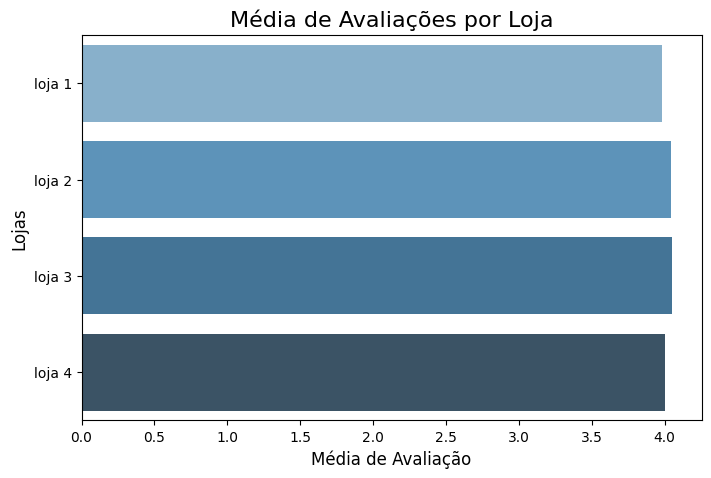

In [23]:

dados = {
    'Loja': lojas_unicas,
    'Média de Avaliação': medias_avaliacoes
}

plt.figure(figsize=(8, 5))
sns.barplot(data=df, y='Loja', x='Média de Avaliação', hue='Loja', palette='Blues_d', legend=False)

plt.title('Média de Avaliações por Loja', fontsize=16)
plt.xlabel('Média de Avaliação', fontsize=12)
plt.ylabel('Lojas', fontsize=12)

plt.show()

Análise do grafico de médias da avaliação:

Loja 3 - apresenta a maior média de avaliações (4.05), o que indica uma experiência do cliente mais positiva em relação ao outras lojas.

Loja 2 - apresenta a media de avaliação (4.04), mostrando um bom nível de satisfação dos clientes. prerecido com a loja 1.

Loja 4 - apresenta uma média de avaliação (4.00), mantendo uma avaliação positiva, porém com leve diferença em relação às outras.

Loja 1 - tem a média mais baixa (3.98), sugerindo que há algum espaço para melhorias.

# 4. Produtos Mais e Menos Vendidos

O código abaixo tem como objetivo identificar os produtos mais vendidos e menos vendidos em cada loja.

In [24]:
lojas_unicas = lojas['Loja'].unique()
mais_vendidos = []
menos_vendidos = []

for loja in lojas_unicas:
    dados_loja = lojas[lojas['Loja'] == loja]
    produtos = dados_loja['Produto'].unique()

    contagens = [sum(dados_loja['Produto'] == p) for p in produtos]

    max_index = contagens.index(max(contagens))
    min_index = contagens.index(min(contagens))

    mais_vendidos.append((loja, produtos[max_index], contagens[max_index]))
    menos_vendidos.append((loja, produtos[min_index], contagens[min_index]))


O código abaixo exibe os produtos mais vendidos e menos vendidos de cada loja.

In [37]:
print("Mais vendidos:")
for loja, produto, qtd in mais_vendidos:
    print(f"{loja} -> {produto} ({qtd} vendas)")

print("\nMenos vendidos:")
for loja, produto, qtd in menos_vendidos:
    print(f"{loja} -> {produto} ({qtd} venda{'s' if qtd > 1 else ''})")

Mais vendidos:
loja 1 -> Micro-ondas (60 vendas)
loja 2 -> Iniciando em programação (65 vendas)
loja 3 -> Kit banquetas (57 vendas)
loja 4 -> Cama box (62 vendas)

Menos vendidos:
loja 1 -> Headset (33 vendas)
loja 2 -> Jogo de tabuleiro (32 vendas)
loja 3 -> Blocos de montar (35 vendas)
loja 4 -> Guitarra (33 vendas)


Gráfico feito usando a biblioteca Matplotlib.

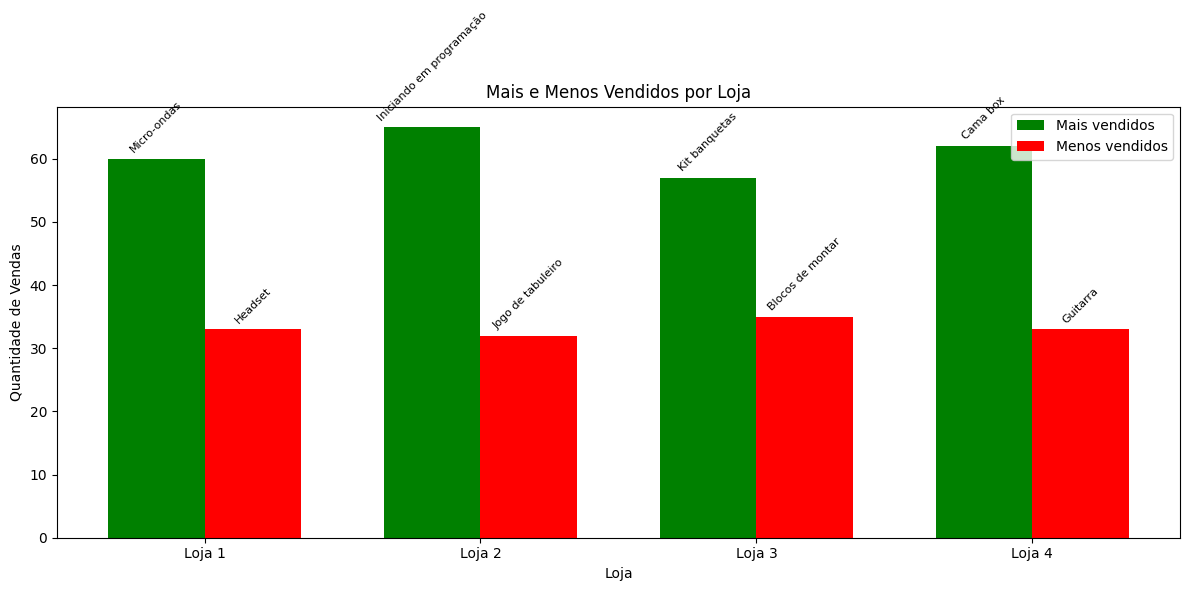

In [43]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
produtos_mais = ['Micro-ondas', 'Iniciando em programação', 'Kit banquetas', 'Cama box']
vendas_mais = [60, 65, 57, 62]

produtos_menos = ['Headset', 'Jogo de tabuleiro', 'Blocos de montar', 'Guitarra']
vendas_menos = [33, 32, 35, 33]

x = np.arange(len(lojas))
largura = 0.35


plt.figure(figsize=(12, 6))
plt.bar(x - largura/2, vendas_mais, width=largura, label='Mais vendidos', color='green')
plt.bar(x + largura/2, vendas_menos, width=largura, label='Menos vendidos', color='red')


for i in range(len(lojas)):
    plt.text(x[i] - largura/2, vendas_mais[i] + 1, produtos_mais[i], ha='center', fontsize=8, rotation=45)
    plt.text(x[i] + largura/2, vendas_menos[i] + 1, produtos_menos[i], ha='center', fontsize=8, rotation=45)

plt.title('Mais e Menos Vendidos por Loja')
plt.xlabel('Loja')
plt.ylabel('Quantidade de Vendas')
plt.xticks(x, lojas)
plt.legend()
plt.tight_layout()
plt.show()

Com base no gráfico produtos mais e menos vendidos por Loja

PProdutos Mais Vendidos:

Loja 1 - Micro-ondas com 60 vendas.

Loja 2 - Iniciando em programação foi o produto mais procurado, com 65 vendas.

Loja 3 - Kit banquetas teve 57 vendas.

Loja 4 - Cama box foi o destaque, com 62 vendas.

rodutos Menos Vendidos:
Loja 1 - Headset registrou apenas 33 vendas, o menor desempenho da loja.

Loja 2 - Jogo de tabuleiro teve o menor número de saídas, com 32 vendas.

Loja 3 - Blocos de montar somou 35, vendas o menor desempenho da loja.

Loja 4 = Guitarra obteve 33 vendas,o menor desempenho da loja.

# 5. Frete Médio por Loja


Código abaixo calcula o frete médio para cada loja

In [54]:
lojas_unicas = lojas['Loja'].unique()

fretes_medios = []

for loja in lojas_unicas:
    dados_loja = lojas[lojas['Loja'] == loja]
    media_frete = sum(dados_loja['Frete']) / len(dados_loja)
    fretes_medios.append(round(media_frete, 2))

Código abaixo imprime o frete médio de cada loja, formatando o valor com duas casas decimais.

In [55]:
for loja, frete in zip(lojas_unicas, fretes_medios):
    print(f"{loja}: Frete médio R$ {frete:.2f}")

loja 1: Frete médio R$ 34.69
loja 2: Frete médio R$ 33.62
loja 3: Frete médio R$ 33.07
loja 4: Frete médio R$ 31.28


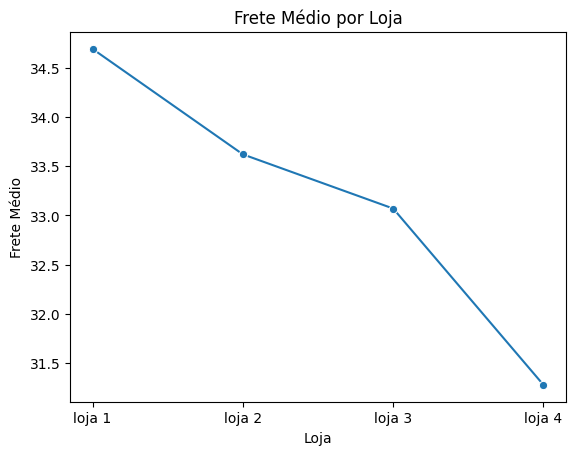

In [69]:
sns.lineplot(data=df_fretes, x='Loja', y='Frete Médio', marker='o')

plt.title("Frete Médio por Loja")
plt.xlabel("Loja")
plt.ylabel("Frete Médio")
plt.show()

Com base no grafico acima - Frete Médio por Loja

Frete médio para cada loja, os resultados são os seguintes:

Loja 1 - O frete médio foi de R$ 34,69.
Apresenta o maior frete médio o que pode indicar custos de envio mais elevados.

Loja 2 - O frete médio foi de R$ 33,62.
Mmenor frete médio, indica o envio mais eficientes ou menores custos.

Loja 3 - O frete médio foi de R$ 33,07.
presenta custo médio baixo dos fretes o que pode indicar ser a loja vantajosa em relação a o frete.

Loja 4 - O frete médio foi de R$ 31,28.
Apresenta o menor custo médio dos fretes o que pode indicar ser a loja mais vantajosa em relação a o frete.





# Relatório Final

Após realizar uma análise detalhada sobre as quatro lojas do Senhor João, levando em consideração diversos fatores como faturamento, categorias de produtos mais e menos vendidas, média das avaliações dos clientes, produtos mais e menos vendidos e frete médio,

**Faturamento Total por Loja**

O faturamento total de cada loja:

Loja 1: R$ 1.534.509,12

Loja 2: R$ 1.488.459,06

Loja 3: R$ 1.464.025,03

Loja 4: R$ 1.384.497,58

Conclusão - A Loja 1 apresenta o maior faturamento, seguida pela Loja 2, Loja 3 e Loja 4.

**Categorias de Produtos Mais e Menos Vendidas**

A análise das categorias mais e menos vendidas por loja revelou as preferências, categorias mais vendidas em todas as lojas, eletrônicos e móveis lideram. Enquanto nas menos vendidas, categorias como instrumentos musicais e livros.

Conclusão - É importante focar nas categorias de eletrônicos e móveis.

 **Média de Avaliações de Clientes**

As médias de avaliações de clientes por loja são as seguintes:

Loja 1: 3.98

Loja 2: 4.04

Loja 3: 4.05

Loja 4: 4.0

Conclusão - A Loja 3 apresenta a maior média de avaliação, o que indica uma boa satisfação dos clientes. Loja 2 também apresenta uma boa avaliação, tornando-a uma boa opção, loja um com menor nivel de avalição, porem loja 1 possui maior nivel de vendas e faturamento o que esta proporcinal com demais lojas.

**Produtos Mais e Menos Vendidos**

Analisando os produtos mais e menos vendidos por loja, notamos que os produtos mais vendidos são itens como micro-ondas, iniciando em programação, kit banquetas e cama box, enquanto os menos vendidos são headset, jogo de tabuleiro, blocos de montar e guitarra.

Conclusão: loja 2 teve o maior indice de venda de um produto seguido pela loja 1, depois loja 4 por ultimo loja 3.

**Frete Médio por Loja**

O frete médio de cada loja são os seguintes valores:

Loja 1 - R$ 34.69

Loja 2 - R$ 33.62

Loja 3 - R$ 33.07

Loja 4 - R$ 31.28

Conclusão: A Loja 4 tem o menor frete médio, o que pode ser um fator positivo,


**Conclusão final**

A Loja 1 se destaca principalmente pelo faturamento, a Loja 4 é a opção que João deve vender, pois teve o menor faturamento (R$ 1.384.497,58) e também apresenta menores vendas em algumas categorias.